## Importing libraries

In [ ]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns

## Sourcing the data

In [ ]:
data=pd.read_csv("loan.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Exploring the data

In [ ]:
data.shape

(39717, 111)

In [ ]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data Cleaning

### Null Value Treatment

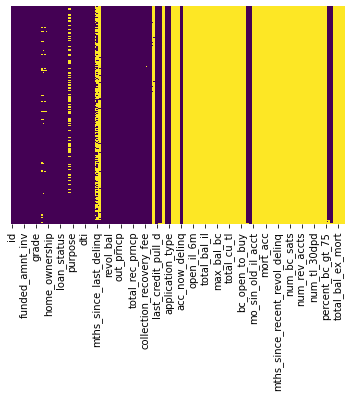

In [ ]:
#plotting a heatmap on the original data to find the missing values
sns.heatmap(data.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

#Observation
#Many columns are present with all null values

In [ ]:
#dropping null values columns
data=data.dropna(axis=1,how='all')

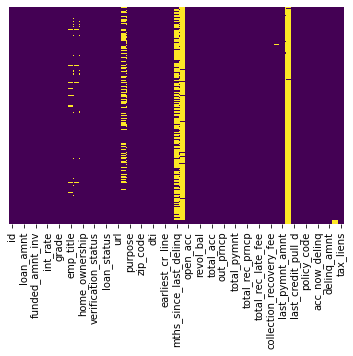

In [ ]:
#checking how the data look like after dropping the null columns
sns.heatmap(data.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [ ]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [ ]:
data.shape

(39717, 57)

In [ ]:
#calculating the % of null values in the rest of the columns 
(data.isnull().sum()/data.shape[0])*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


Setting maximum threshold for missing values to be 30. 

Deleting all columns with missing values more than 30%


In [ ]:
#Deleting columns with more than 30% null values
data = data.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],axis=1)

In [ ]:
(data.isnull().sum()/data.shape[0])*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [ ]:
#data driven derived metric from description as description length which can be used later in the analysis
#firstly cleaning the desc column for null values
data.desc = data.desc.fillna('')
#deriving the column
data['desc_length'] = [len(i) for i in data.desc]
# now we can drop the desc column

### Deleting Unrelevant Columns

In [ ]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'desc_length'],
      dtype='object')

In [ ]:
#dropping unrelevant columns for analysis
data = data.drop(['desc','url','collection_recovery_fee','delinq_2yrs','earliest_cr_line','id','inq_last_6mths','last_credit_pull_d','member_id','pub_rec','pymnt_plan','recoveries','total_acc','revol_bal','revol_util','initial_list_status','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','last_pymnt_d','last_pymnt_amnt','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','pub_rec_bankruptcies','tax_liens','open_acc','emp_title','zip_code','title'],axis = 1)

In [ ]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'desc_length'],
      dtype='object')

In [ ]:
#data driven metrics-- issue date
data.issue_d.unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07'], dtype=object)

In [ ]:
#extracting year and month from the issue_d column
data.issue_d = pd.to_datetime(data.issue_d, format='%b-%y')
data['issue_d_year']=data['issue_d'].dt.year
data['issue_d_month']=data['issue_d'].dt.month

In [ ]:
#now we can drop the issue_d column
data = data.drop(['issue_d'],axis=1)

In [ ]:
data.shape

(39717, 19)

In [ ]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose',
       'addr_state', 'dti', 'desc_length', 'issue_d_year', 'issue_d_month'],
      dtype='object')

In [ ]:
#Analysing loan_status column
data.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [ ]:
#since we dont need data with current as loan status as it is active loan, we will drop the data with loan status as current
data = data[(data['loan_status']=='Fully Paid') | (data['loan_status']=='Charged Off')]

In [ ]:
data.shape

(38577, 19)

In [ ]:
#Analysing emp_length column
data.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [ ]:
#treating emp_length null values and filling it with 0
data.emp_length = data.emp_length.fillna('0 years')

In [ ]:
data.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       '0 years'], dtype=object)

In [ ]:
#Analysing int_rate column
data.int_rate.unique()

array(['10.65%', '15.27%', '15.96%', '13.49%', '7.90%', '18.64%',
       '21.28%', '12.69%', '14.65%', '9.91%', '16.29%', '6.03%', '11.71%',
       '12.42%', '14.27%', '16.77%', '7.51%', '8.90%', '18.25%', '6.62%',
       '19.91%', '17.27%', '17.58%', '21.67%', '19.42%', '20.89%',
       '20.30%', '23.91%', '19.03%', '23.13%', '22.74%', '22.35%',
       '22.06%', '24.11%', '6.00%', '23.52%', '22.11%', '7.49%', '11.99%',
       '5.99%', '10.99%', '9.99%', '18.79%', '11.49%', '8.49%', '15.99%',
       '16.49%', '6.99%', '12.99%', '15.23%', '14.79%', '5.42%', '10.59%',
       '17.49%', '15.62%', '19.29%', '13.99%', '18.39%', '16.89%',
       '17.99%', '20.99%', '22.85%', '19.69%', '20.62%', '20.25%',
       '21.36%', '23.22%', '21.74%', '22.48%', '23.59%', '12.62%',
       '18.07%', '11.63%', '7.91%', '7.42%', '11.14%', '20.20%', '12.12%',
       '19.39%', '16.11%', '17.54%', '22.64%', '13.84%', '16.59%',
       '17.19%', '12.87%', '20.69%', '9.67%', '21.82%', '19.79%',
       '18.49%', '

In [ ]:
#cleaning int_rate column
data.int_rate = data.int_rate.apply(lambda x: x.strip('%'))

In [ ]:
#Changing data type for int_rate
data.int_rate = data.int_rate.astype('float64')

In [ ]:
#cleaning home_ownership column. As per the dictionary, the valid data is Rent,Own,Mortage,Other but the data have None as well.
#We can drop this value as it has only 3 rows and it will not affect our analysis.
data= data[-(data['home_ownership']=='NONE')]

### Sanity Checks

In [ ]:
#comparing funded_amnt to be less or equal to loan_amnt
data[data['funded_amnt']>data['loan_amnt']]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,desc_length,issue_d_year,issue_d_month


In [ ]:
#comparing funded_amnt_inv to be less or equal to funded_amnt
data[data['funded_amnt_inv']>data['funded_amnt']] 

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,desc_length,issue_d_year,issue_d_month


# Univariate Analysis

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


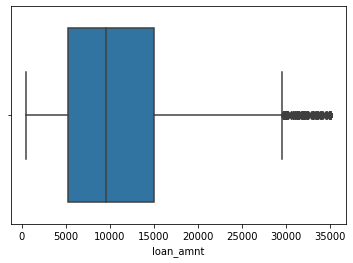

In [ ]:
#Analysing loan_amnt column
sns.boxplot(data.loan_amnt)

In [ ]:
#removing outliers
data = data[-(data['loan_amnt']>30000)]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


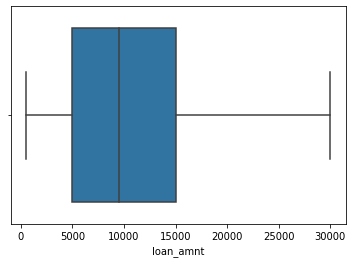

In [ ]:
#data after removing outliers
sns.boxplot(data.loan_amnt)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


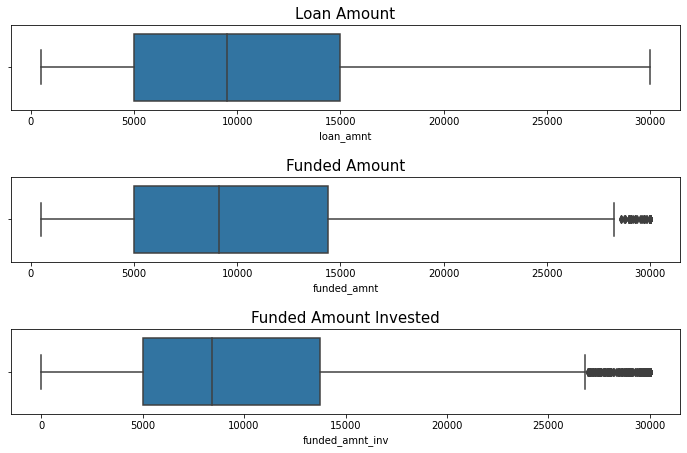

In [ ]:
#plotting loan_amnt, funded_amnt and funded_amnt_inv together to take a look at the data side by side
fig,ax = plt.subplots(nrows=3,figsize=(12,8))
plt.subplots_adjust(hspace = 0.8, top = 0.8)
g1 = sns.boxplot(data.loan_amnt,ax=ax[0])
g1.set_title("Loan Amount", fontsize=15)
g2 = sns.boxplot(data.funded_amnt,ax=ax[1])
g2.set_title("Funded Amount", fontsize=15)
g3 = sns.boxplot(data.funded_amnt_inv,ax=ax[2])
g3.set_title("Funded Amount Invested", fontsize=15)
plt.show()

#Observation
#1- Most of the loan amount lies between 5000 to 15000
#2- 75th quartile and max amount is slight lesser than loan amount
#3- The 75th Quartile and max amount is much lesser than loan_amnt
#4- The funded_amnt_inv is always low than loan_amnt

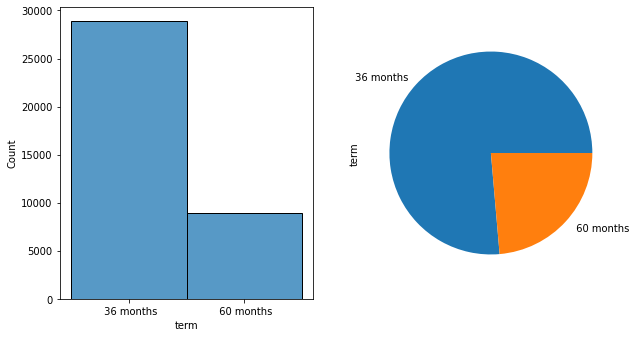

In [ ]:
#plotting term column
fig,ax = plt.subplots(ncols=2,figsize=(10,6))
plt.subplots_adjust(hspace = 0.8, top = 0.8)
g1=sns.histplot(data.term,ax=ax[0])
g2=data.term.value_counts().plot.pie(ax=ax[1])
#Observation
#Most of the loans are for a term of 36 months


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


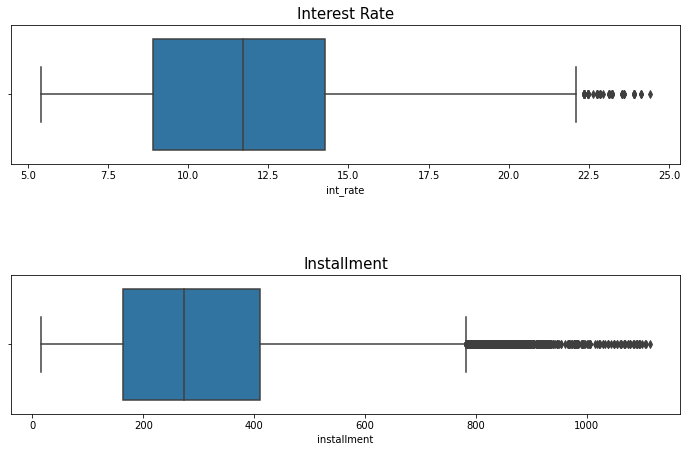

In [ ]:
#plotting Interest Rate and Installments data
fig,ax = plt.subplots(nrows=2,figsize=(12,8))
plt.subplots_adjust(hspace = 0.8, top = 0.8)
g1 = sns.boxplot(data.int_rate,ax=ax[0])
g1.set_title("Interest Rate", fontsize=15)
g2 = sns.boxplot(data.installment,ax=ax[1])
g2.set_title("Installment", fontsize=15)
plt.show()

#Observation
#1- The Interquartile range for interest rate is from 8.75 to 14
#2- The IQR for Installments is from 180 to 420

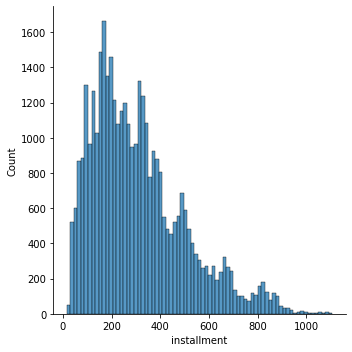

In [379]:
sns.displot(data.installment)

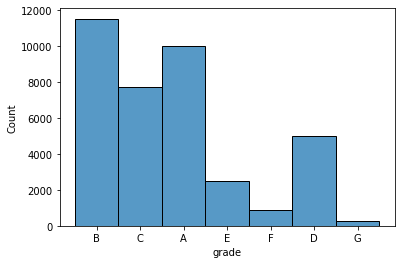

In [ ]:
#plotting grade
sns.histplot(data.grade)

#Observaton
#1- There are very less loans with grade G relative to complete data
#2- Maximum no of loans are from grade B
#3- loan count decreases as we go ascending to the grade considering A as first grade

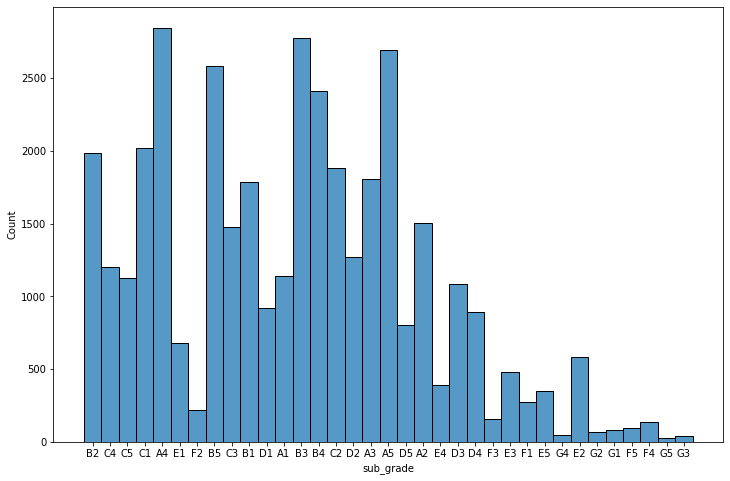

In [ ]:
#plotting sub grade
plt.figure(figsize=(12,8))
sns.histplot(data.sub_grade)
plt.show()

#Observation
#1- Most of the loans have subgrade A4


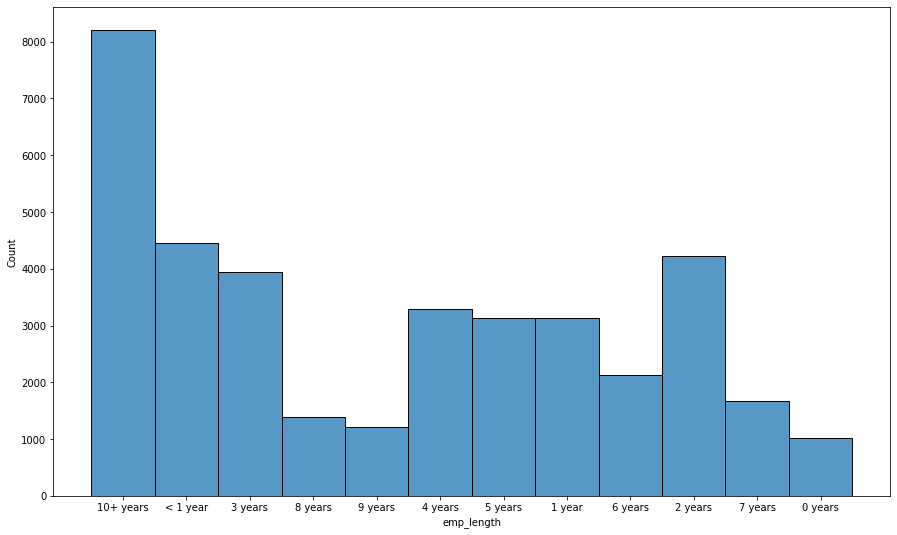

In [ ]:
#plotting term of employement as provided by the borrower
plt.figure(figsize=(15,9))
sns.histplot(data.emp_length)
plt.show()

#Observation
#1- Most of the loans are from people who are employed for more than 10 years

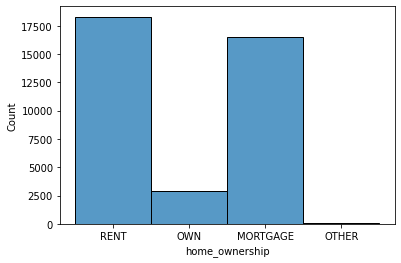

In [ ]:
#plotting home ownership
sns.histplot(data.home_ownership)

#Observation
#1- Most of the loan borrowers are lining on rent or have their home on Mortage 
#2- The count of loan borrowers having home ownership as None is low 

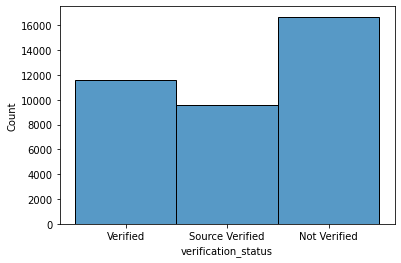

In [ ]:
#plotting verification status
sns.histplot(data.verification_status)

#Observation
#1- Most of the borrowers have their Income not verified by LC

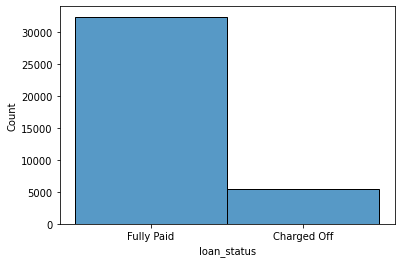

In [ ]:
#plotting loan status
sns.histplot(data.loan_status)

#Observation
#1- Most of the loans are fully paid
#2- Charged off rate is low relative to fully paid loans

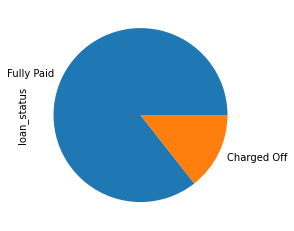

In [ ]:
#plotting loan status as pie chart
data.loan_status.value_counts().plot.pie()

#Observation
#1- More than 75% of the loans are fully paid.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text major ticklabel objects>)

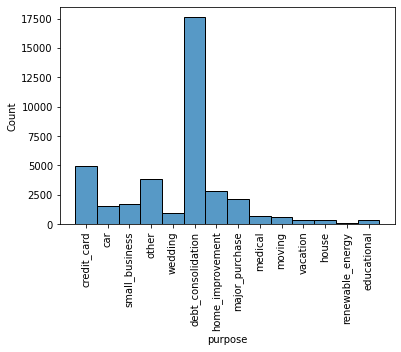

In [ ]:
#plotting purpose of the loan
sns.histplot(data.purpose)
plt.xticks(rotation=90)

#Observation
#1- Maximum number of loans are applied for the purpose of debt consolidation
#2- 2nd most applied purpose of loan is credit card

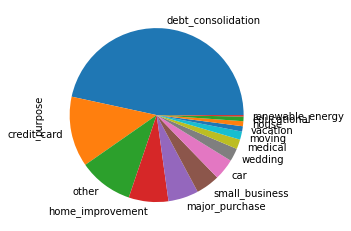

In [ ]:
#plotting purpose of the loan as pie chart
data.purpose.value_counts().plot.pie()

#Observation
#1- More than 40% of the loans are applied with the purpose of debt consolidation


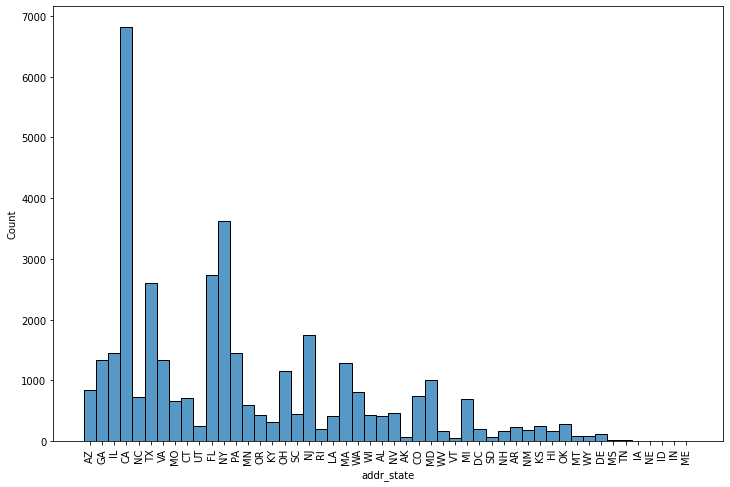

In [ ]:
#plotting address state
plt.figure(figsize=(12,8))
sns.histplot(data.addr_state)
plt.xticks(rotation=90)
plt.show()

#Observation
#1- Top 3 states for loan applications are CA,NY and FL
#2- Loan applications from CA are relatively high with respect to the NY and FL

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


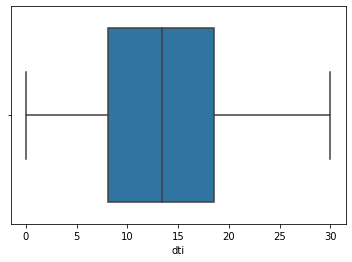

In [ ]:
#plotting dti
sns.boxplot(data.dti)

#Observation
#1- Most of the values lie between 7.25 to 18

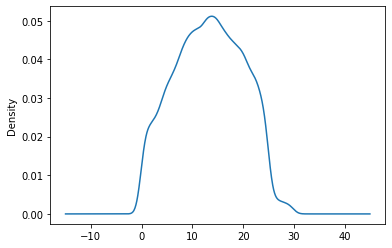

In [ ]:
#plotting dti as line graph
data['dti'].plot(kind='kde')

#Observation
#1- Dti data s evenly spread throughout

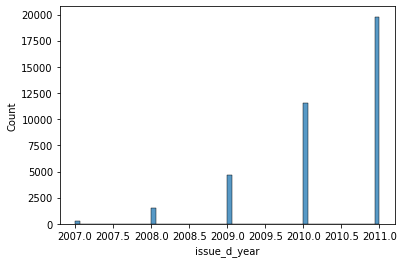

In [ ]:
#plotting year of issue of the loan
sns.histplot(data.issue_d_year)

#Observation
#1- Most of the loans are borrowed during 2011
#2- the no of loan application increases each year

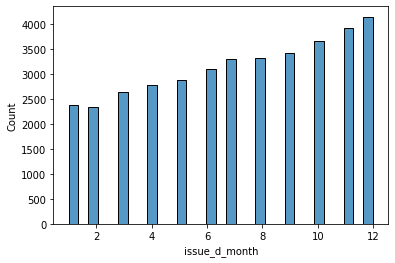

In [ ]:
#plottig issue month
sns.histplot(data.issue_d_month)

#Observation
#1- loan application increase thorughout the year


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


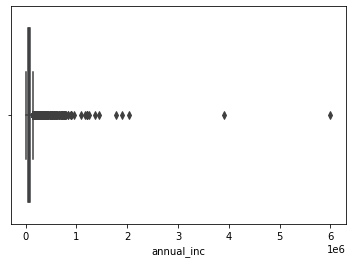

In [ ]:
#plotting annual income of borrowers
sns.boxplot(data.annual_inc)

#Observation
#1- There are some borrowers with relatively high annual income.
#2- The annual income of most of the borrowers is low.

In [ ]:
#cleaning the annual_inc column.
#here we see the data has some outliers which seems to be an extreme high value.
data.annual_inc.describe()

count    3.783900e+04
mean     6.763401e+04
std      6.343049e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.780000e+04
75%      8.000000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [ ]:
#cleaning the data by dropping the outlier
data = data[data['annual_inc']<data['annual_inc'].quantile(0.99)]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


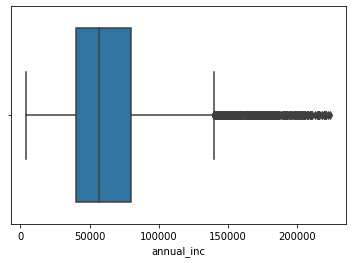

In [ ]:
#plotting annual income again
sns.boxplot(data.annual_inc)

#Observation
#1- Most of the borrowers have annual income between 40000 to 80000

In [ ]:
#Manual function for binning annual Income
def bin(x):
  data=x.annual_inc
  if data < 20000:
    return '<20000'
  elif data>=20000 and data <40000:
    return '<40000'
  elif data>=40000 and data <60000:
    return '<60000'
  elif data>=60000 and data <80000:
    return '<80000'
  elif data>=80000 and data <100000:
    return '<100000'
  elif data>=100000 and data <120000:
    return '<120000'
  elif data>=120000:
    return '>=120000'

In [ ]:
#binning the annual_inc column to get a better view of the data
data['binned_annual_inc'] = data.apply(bin,axis=1)

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

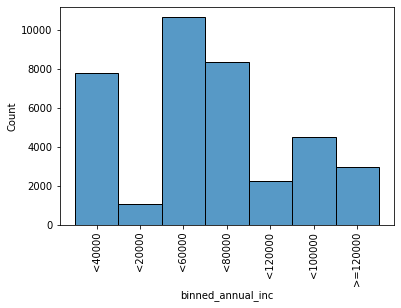

In [ ]:
sns.histplot(data['binned_annual_inc'])
plt.xticks(rotation = 90)

#Observation
#1- Most of the borrowers have annual income between 40000 to 60000
#2- Very few borrowers have annual income less than 20000
#3- Average annual income of borrowers is in the range 20000 to 80000

## Segmented Univariate and Bivariate Analysis

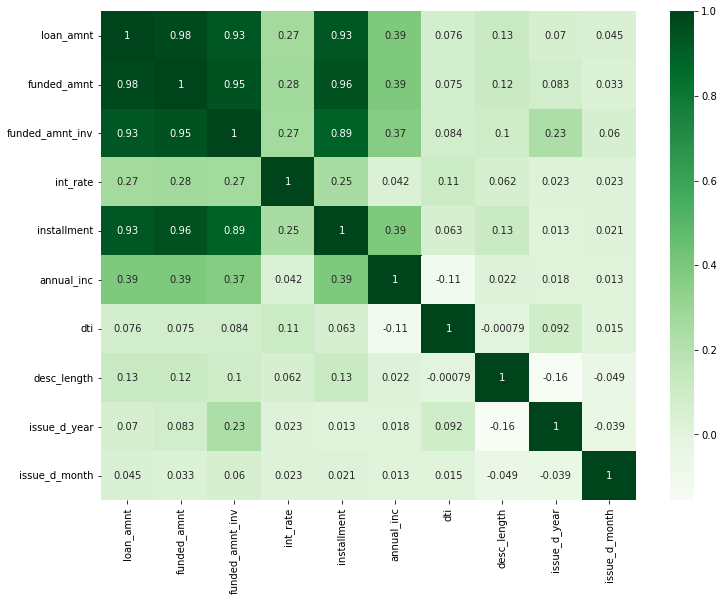

In [ ]:
#plotting correlation on a heatmap
plt.figure(figsize=(12,9))
sns.heatmap(data.corr(),annot=True,cmap='Greens')
plt.show()

#Observation
#1- We can cluster loan amount, funded amount and funded amount invested as they are highly correlated.
#2- dti is slightly inversely correlated to annual income.
#3- Annual income is lightly correlated with loan amount,funded amount and funded amount invested.

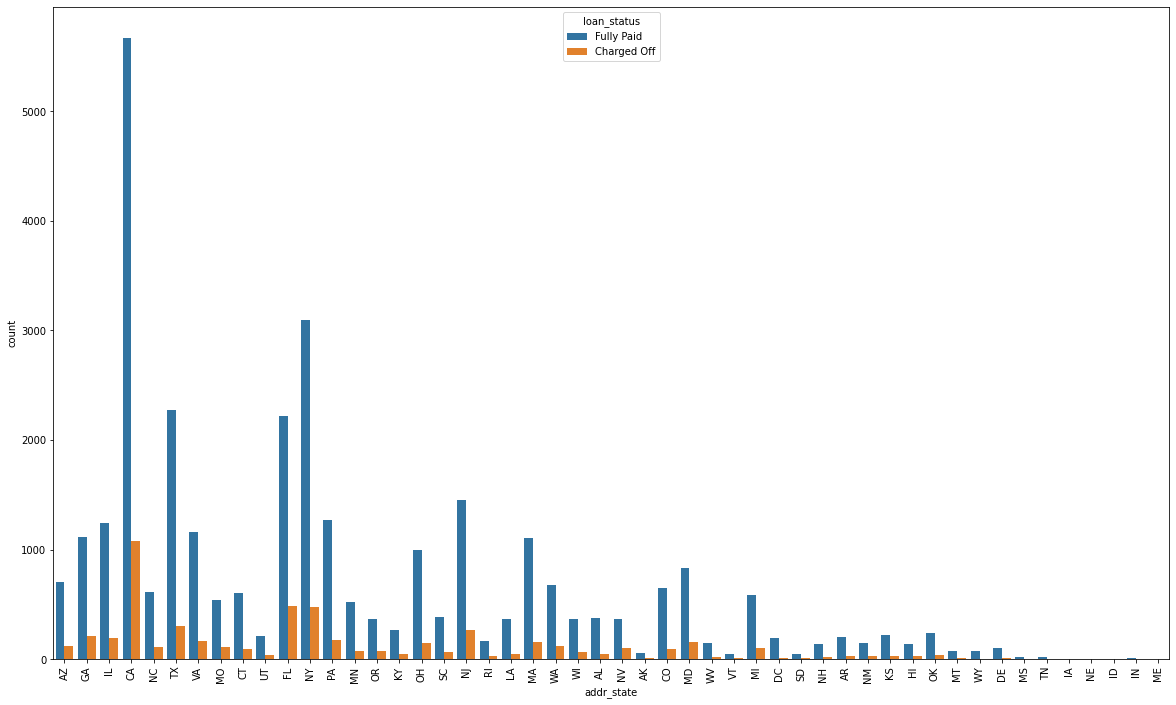

In [ ]:
#plotting address state with respect to loan status
plt.figure(figsize=[20,12])
sns.countplot(data=data,x='addr_state',hue = 'loan_status')
plt.xticks(rotation = 90)
plt.show()

#Observation
#1- Most amount of charged off loans are from CA, NY and FL


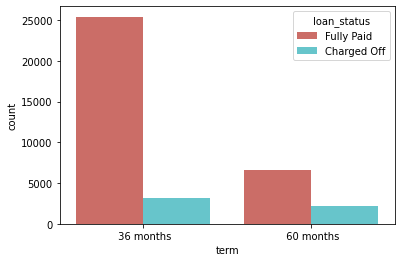

In [ ]:
#plotting term with respect to loan status
sns.countplot(x="term",data=data, 
              palette="hls", 
              hue = "loan_status")

#Observation
#1- Charge off rate for term of 60 months is higher than loans of 36 months term.
#2- We can say that the higher term loans are more likely to charge off. 

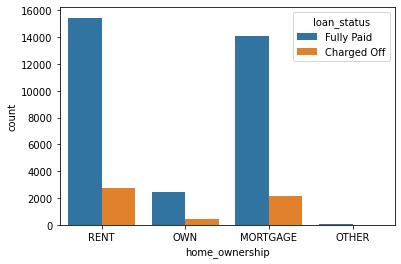

In [ ]:
#plotting home ownership with respect to loan status
sns.countplot(data=data,x='home_ownership',hue = 'loan_status')

#Observation
#1- Borrowers having home ownership as rent or mortgage are more likely to charge off.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


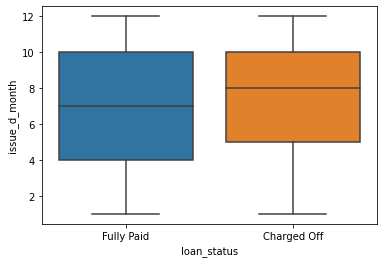

In [ ]:
#plotting issue month with respect to loan status
sns.boxplot(data.loan_status,data.issue_d_month)

#Observation
#1- Most of the charged off loans are borrowed in months may to october

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


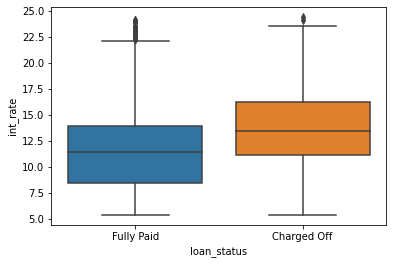

In [ ]:
#plotting interest rate with respect to loan status
sns.boxplot(data.loan_status,data.int_rate)

#Observation
#1- Loans with high interest rate are more likely to charge off.
#2- Most of the loans tht charge off have interest rate between 12 to 17

In [ ]:
#Analysing purpose with respect to loan status
data2 = data.groupby(by=['purpose','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
data2['Charged_Off_rate'] = data2['Charged Off']/(data2['Charged Off']+data2['Fully Paid'])
data2

loan_status,purpose,Charged Off,Fully Paid,Charged_Off_rate
0,car,160,1329,0.107455
1,credit_card,522,4387,0.106335
2,debt_consolidation,2651,14860,0.151391
3,educational,55,268,0.170279
4,home_improvement,327,2388,0.120442
5,house,54,293,0.155620
6,major_purchase,219,1890,0.103841
7,medical,104,565,0.155456
8,moving,91,476,0.160494
9,other,617,3172,0.162840


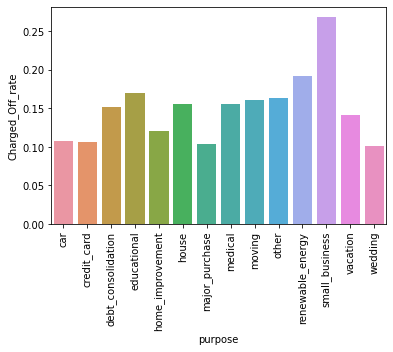

In [ ]:
#Plotting Purpose with respect to loan status
sns.barplot(x=data2.purpose,y=data2.Charged_Off_rate,data=data2)
plt.xticks(rotation=90)
plt.show()

#Observation
#1- Loans having purpose of small business are more likely to charge off.

In [ ]:
#Analysing charge off rate for home ownership variable 
data3 = data.groupby(by=['home_ownership','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
data3['Charged_off_rate'] = data3['Charged Off']/(data3['Charged Off']+data3['Fully Paid'])
data3 = data3[-(data3['home_ownership']=='OTHER')]
data3

loan_status,home_ownership,Charged Off,Fully Paid,Charged_off_rate
0,MORTGAGE,2184,14051,0.134524
2,OWN,430,2479,0.147817
3,RENT,2774,15443,0.152275


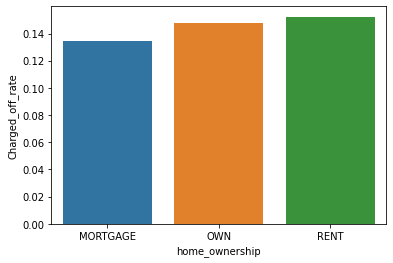

In [ ]:
#plotting home ownership with respect to charge off rate
sns.barplot(x=data3.home_ownership,y=data3.Charged_off_rate,data=data3)

#Observation
#1- Borrowers with home ownership as rent are more likely to charge off.


In [ ]:
#Analysing term with loan status
data4 = data.groupby(by=['term','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
data4['Charged_off_rate'] = data4['Charged Off']/(data4['Charged Off']+data4['Fully Paid'])
data4

loan_status,term,Charged Off,Fully Paid,Charged_off_rate
0,36 months,3183,25422,0.111274
1,60 months,2223,6629,0.251130


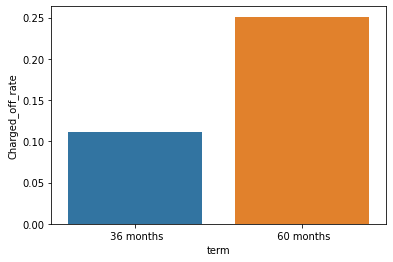

In [ ]:
#plotting term with charge off rate
sns.barplot(x=data4.term,y=data4.Charged_off_rate,data=data4)

#Observation
#1- Loans with high payment term are more likely to charge off.

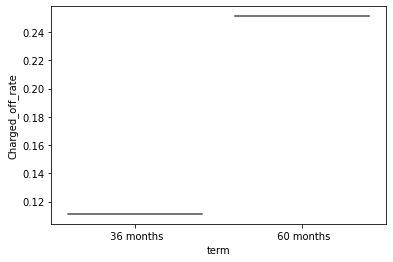

In [ ]:
#plotting term with charge off rate in boxen plot
sns.boxenplot(x="term", y="Charged_off_rate",
              color="b",
              scale="linear", data=data4)

In [ ]:
#Analysing address state with loan status
data5 = data.groupby(by=['addr_state','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
data5['Charged_off_rate'] = data5['Charged Off']/(data5['Charged Off']+data5['Fully Paid'])
data5['Total'] = data5['Charged Off']+data5['Fully Paid']
#data5 = data5[data5['Total']<1500]
data5

loan_status,addr_state,Charged Off,Fully Paid,Charged_off_rate,Total
0,AK,14.0,60.0,0.189189,74.0
1,AL,49.0,371.0,0.116667,420.0
2,AR,27.0,206.0,0.115880,233.0
3,AZ,119.0,708.0,0.143894,827.0
4,CA,1081.0,5669.0,0.160148,6750.0
5,CO,91.0,647.0,0.123306,738.0
6,CT,90.0,600.0,0.130435,690.0
7,DC,14.0,192.0,0.067961,206.0
8,DE,12.0,99.0,0.108108,111.0
9,FL,485.0,2220.0,0.179298,2705.0


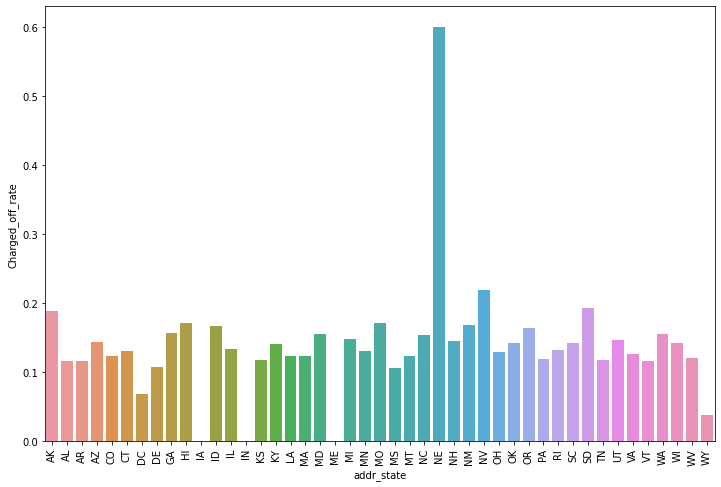

In [ ]:
#plotting address state with respect to charge off rate
plt.figure(figsize=(12,8))
sns.barplot(x=data5.addr_state,y=data5.Charged_off_rate,data=data5)
plt.xticks(rotation=90)
plt.show()

#Observation
#1- loans from NE state are most likely to charged off.
#2- In comparison to the data there is some bias as the count for the values differ in high margin.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


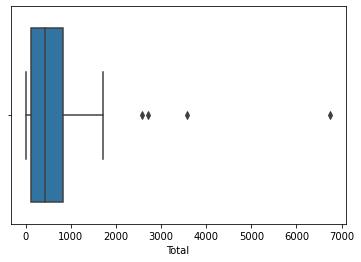

In [ ]:
sns.boxplot(data5['Total'])
#Observation
#Here are some outliers which are biasing the data.

In [ ]:
dataa = data5[data5['Total']>1500]
#Extracting the most number of loans borrowed state.

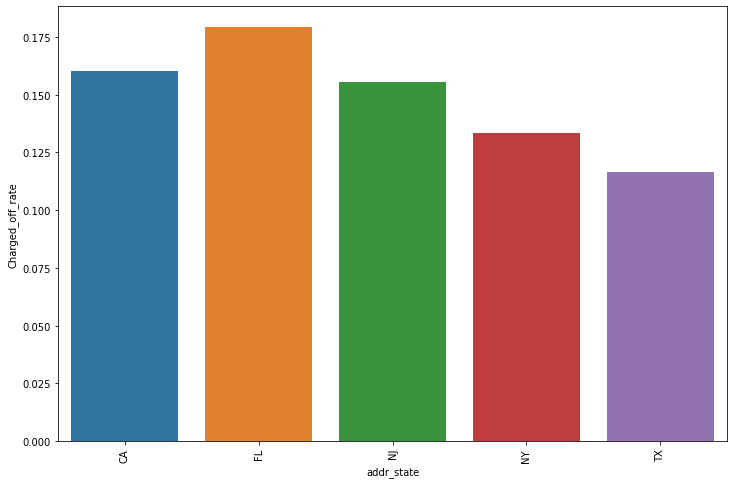

In [ ]:
#plotting address state with respect to charge off rate
plt.figure(figsize=(12,8))
sns.barplot(x=dataa.addr_state,y=data5.Charged_off_rate,data=data5)
plt.xticks(rotation=90)
plt.show()

#Observation
#1- loans from FL state are most likely to charged off

In [ ]:
#Analysing verification status with loan status
data6 = data.groupby(by=['verification_status','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
data6['Charged_off_rate'] = data6['Charged Off']/(data6['Charged Off']+data6['Fully Paid'])
data6

loan_status,verification_status,Charged Off,Fully Paid,Charged_off_rate
0,Not Verified,2128,14453,0.128340
1,Source Verified,1394,8044,0.147701
2,Verified,1884,9554,0.164714


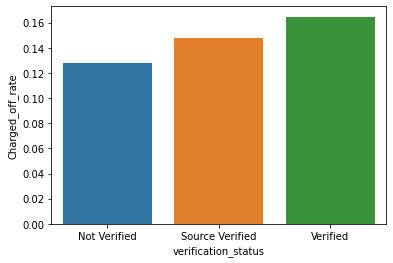

In [ ]:
#plotting verification status with charged off rate
sns.barplot(data=data6,x='verification_status',y='Charged_off_rate')

#Observation
#1- borrowers with verification status as verified are more likely to charge off.

In [ ]:
#Analysing grade with loan status
data7 = data.groupby(by=['grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
data7['Charged_off_rate'] = data7['Charged Off']/(data7['Charged Off']+data7['Fully Paid'])
data7

loan_status,grade,Charged Off,Fully Paid,Charged_off_rate
0,A,600,9321,0.060478
1,B,1393,10037,0.121872
2,C,1312,6308,0.172178
3,D,1082,3834,0.220098
4,E,655,1784,0.268553
5,F,276,595,0.316877
6,G,88,172,0.338462


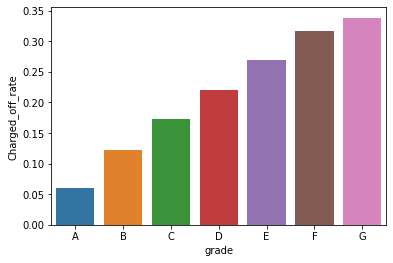

In [ ]:
#plotting grade with charged off rate
sns.barplot(data=data7,x='grade',y='Charged_off_rate')

#Observation
#1- As we move from lower grade to higher grade considering A as the lowest grade, the charge off rate increases.
#2- Loans with grade G are most likely to charge off.

In [ ]:
#Analysing sub grade with loan status
data8 = data.groupby(by=['sub_grade','loan_status']).loan_status.count().unstack().reset_index()
data8['charged_off_rate'] = data8['Charged Off']/(data8['Charged Off']+data8['Fully Paid'])
data8

loan_status,sub_grade,Charged Off,Fully Paid,charged_off_rate
0,A1,30,1102,0.026502
1,A2,74,1423,0.049432
2,A3,103,1692,0.057382
3,A4,177,2652,0.062566
4,A5,216,2452,0.080960
5,B1,169,1601,0.095480
6,B2,223,1744,0.113371
7,B3,326,2415,0.118935
8,B4,322,2068,0.134728
9,B5,353,2209,0.137783


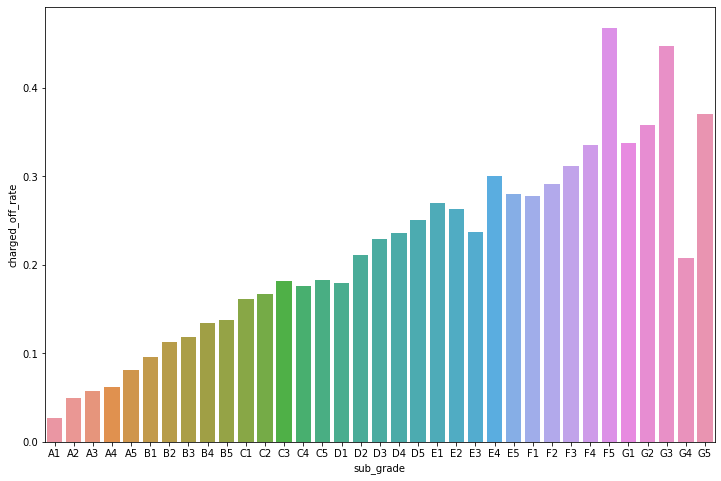

In [ ]:
#plotting subgrade with charged off rate
plt.figure(figsize=(12,8))
sns.barplot(data=data8,x='sub_grade',y='charged_off_rate')

#Observation
#1- Loans with grade from F5 to G5 are most likely to charged off.

In [ ]:
#Analysing borrowers term of employment to loan status
data9 = data.groupby(by=['emp_length','loan_status']).loan_status.count().unstack().reset_index()
data9['Charged_off_rate'] = data9['Charged Off']/(data9['Charged Off']+data9['Fully Paid'])
data9

loan_status,emp_length,Charged Off,Fully Paid,Charged_off_rate
0,0 years,221,791,0.218379
1,1 year,453,2662,0.145425
2,10+ years,1245,6826,0.154256
3,2 years,549,3643,0.130964
4,3 years,534,3383,0.136329
5,4 years,442,2821,0.135458
6,5 years,445,2668,0.142949
7,6 years,296,1817,0.140085
8,7 years,251,1415,0.150660
9,8 years,194,1181,0.141091


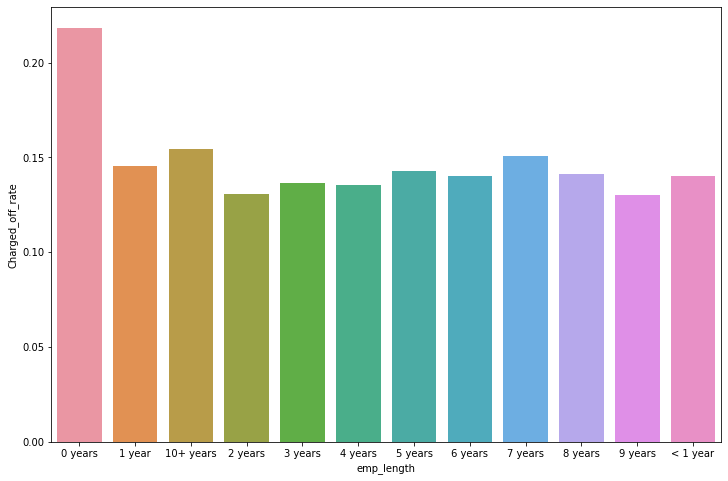

In [ ]:
#plotting term of employement with charged off rate
plt.figure(figsize=(12,8))
sns.barplot(data=data9,x='emp_length',y='Charged_off_rate')

#Observation
#1- borrowers with Lowest employement term are more likely to charge off.

In [ ]:
#Analysing issue date with loan status
data10 = data.groupby(by=['issue_d_year','issue_d_month','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
data10['Charged_off_rate'] = data10['Charged Off']/(data10['Charged Off']+data10['Fully Paid'])
data10['Total'] = data10['Charged Off']+data10['Fully Paid']
data10

loan_status,issue_d_year,issue_d_month,Charged Off,Fully Paid,Charged_off_rate,Total
0,2007,6,0.0,1.0,0.000000,1.0
1,2007,7,0.0,29.0,0.000000,29.0
2,2007,8,7.0,23.0,0.233333,30.0
3,2007,9,3.0,14.0,0.176471,17.0
4,2007,10,10.0,36.0,0.217391,46.0
5,2007,11,5.0,30.0,0.142857,35.0
6,2007,12,18.0,67.0,0.211765,85.0
7,2008,1,31.0,136.0,0.185629,167.0
8,2008,2,25.0,149.0,0.143678,174.0
9,2008,3,40.0,194.0,0.170940,234.0


In [ ]:
#sorting values with respect to charged off rate so we can find which year and month loas are most likely to charge off.
data10.sort_values(['Charged_off_rate'],ascending=False)

#Observation
#1- Loans issued in august 2007 are mostly charged off.

loan_status,issue_d_year,issue_d_month,Charged Off,Fully Paid,Charged_off_rate,Total
2,2007,8,7.0,23.0,0.233333,30.0
4,2007,10,10.0,36.0,0.217391,46.0
6,2007,12,18.0,67.0,0.211765,85.0
13,2008,7,17.0,66.0,0.204819,83.0
54,2011,12,399.0,1559.0,0.203779,1958.0
7,2008,1,31.0,136.0,0.185629,167.0
47,2011,5,279.0,1272.0,0.179884,1551.0
3,2007,9,3.0,14.0,0.176471,17.0
10,2008,4,27.0,127.0,0.175325,154.0
9,2008,3,40.0,194.0,0.170940,234.0


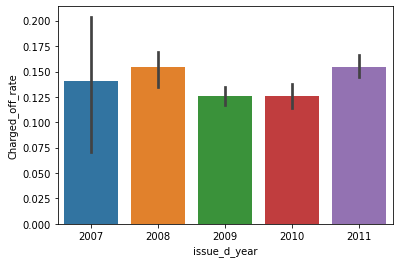

In [ ]:
#plotting issue date year with 
sns.barplot(data=data10,x='issue_d_year',y='Charged_off_rate')

#Observation
#1- The loans in year 2008 and 2011 are most likely to charge off. But no clear indication of getting charged off.

In [ ]:
#Analysing annaual income with loan status
data11 = data.groupby(by=['binned_annual_inc','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
data11['Charged_off_rate'] = data11['Charged Off']/(data11['Charged Off']+data11['Fully Paid'])
data11

loan_status,binned_annual_inc,Charged Off,Fully Paid,Charged_off_rate
0,<100000,516,3968,0.115076
1,<120000,214,2009,0.096266
2,<20000,227,831,0.214556
3,<40000,1368,6416,0.175745
4,<60000,1619,9011,0.152305
5,<80000,1145,7178,0.137571
6,>=120000,317,2638,0.107276


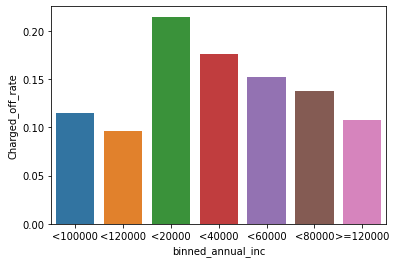

In [ ]:
#plotting annual income with charged off rate
sns.barplot(data=data11,x='binned_annual_inc',y='Charged_off_rate')

#Observation
#1- Borrowers with low annual income are more likely to charge off.

## Conclusion

The variables deciding the loan to be charged off are:



1.   Term of repayment
2.   Purpose



3.   Home Ownership
4.   Grade and subgrade



5.   Interest Rate
6.   Annual Income



7.   Verification Status

1.   Term of employement










Hence are the driving metrics for the analysis.

### Note:

While Analysing the address state with loan tatus, the value counts are not same for each state hence there is a bias. 

We extrated 5 states from where most of the loans were applied and analysed on that basis.

Similar is done with home ownership

## Recommendation

Analyse with respect to the predicting variables to reduce the count of charged off loans. 